# Data Analysis CPSC368 Group 4: : Analyzing the impact of air quality and sanitation on public health


In [2]:
import oracledb
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# 1. Introduction

The purpose of this research is to delve into the interconnection between PM2.5 air pollution levels, the provision of safely managed sanitation, and global mortality rates. Our investigation is particularly focused on sustainable cities, examining the collaborative impact of PM2.5 levels and advanced sanitation facilities on public health outcomes. This study aims to unravel the intricate dynamics of environmental factors and their direct implications for the health and well-being of populations worldwide.

The idea of investigating the impact of PM2.5 air pollution levels and the proportion of use of safely managed health services on global mortality is directly related to the overall theme of climate and sustainable development. The United Nations has defined 17 sustainable development goals, including "Climate Action," "Clean Water and Sanitation," and "Good Health and Well-being." Correspondingly, the level of PM2.5 air pollution is partly representative of the climate; the proportion of safely managed sanitation services is representative of sanitation; and the global mortality rate is representative of human health.

## Group Members:

- Yunxuan Zhang 88719752
- Yanxin Liang 50798412
- Yelia Ye 89657605

*Note: The order of names listed for the group members is in random sequence and does not reflect any hierarchy or order of contribution.*


# 2. Data Description

In our endeavor to understand the intricate relationship between environmental sustainability and health outcomes, we shall leverage three pivotal datasets. These datasets, curated by reputable sources, will be integrated to provide a comprehensive perspective on the factors influencing global mortality rates in the context of air pollution and sanitation.

### PM2.5 Air Pollution Dataset
The PM2.5 Air Pollution Dataset is sourced from Brauer et al. (2017) via the World Bank, processed and presented by Our World in Data. It provides detailed information on mean annual exposure to PM2.5 air pollution, measured in micrograms per cubic meter. This dataset encapsulates the severity of air pollution across various geographies, serving as a primary indicator of environmental quality.
- **Source**: [Our World in Data - Sustainable Cities](https://ourworldindata.org/sdgs/sustainable-cities)
- **Citation**: Brauer et al. (2017) via World Bank – Our World in Data.

### Global Death Rate Dataset
The Global Death Rate Dataset, as processed by Our World in Data, presents the grim reality of mortality attributable to air pollution. This dataset, originating from the IHME Global Burden of Disease Study (2019), quantifies deaths per 100,000 individuals, age-standardized for both sexes. It underscores the human cost of environmental neglect.
- **Source**: [Our World in Data - Air Pollution](https://ourworldindata.org/air-pollution)
- **Citation**: IHME, Global Burden of Disease Study (2019).

### Share Using Safely Managed Sanitation Dataset
The Share Using Safely Managed Sanitation Dataset illuminates the proportion of the population with access to secure sanitation facilities. Sourced from the United Nations (2023) and minimally processed by Our World in Data, this dataset is critical for assessing public health infrastructure's role in mitigating pollution-related risks.
- **Source**: [Our World in Data - Clean Water and Sanitation](https://ourworldindata.org/sdgs/clean-water-sanitation)
- **Citation**: United Nations (2023) – WHO/UNICEF JMP.

Each dataset, reflecting over 50 rows and 4 columns, is a testament to the rigorous data collection and analysis efforts by institutions such as the World Bank, the IHME, and the United Nations. The transparent and traceable methodologies employed in these datasets ensure their credibility and reliability, forming a robust foundatio for our analysis.


## 3. Data Acquisition

The following SQL queries and Python code detail the process of data acquisition from an Oracle database, transforming the raw data into structured Pandas DataFrames for further analysis.

1. **Death Numbers**: The total death numbers for each country，these deaths are based on environmental and inhalable particles in the lungs., grouped by year, are extracted from the `death_number` table. The resulting DataFrame `df_death` captures the sum of deaths, providing a yearly overview of mortality.

    ```python
    query_death = 'SELECT year, SUM(number_of_deaths) AS total_deaths FROM death_number GROUP BY year'
    df_death = pd.DataFrame(cur.fetchall(), columns=['year', 'total_deaths'])
    ```

2. **Sanitation Levels**: The overall sanitation levels, represented by the proportion of safely managed wastewater, are aggregated from the `safely_managed_sanitation` table. The DataFrame `df_sanitation` reflects the yearly sum of sanitation levels across all countries.

    ```python
    query_sanitation = 'SELECT year, SUM(proportion_of_wastewater_treated_safely) AS total_sanitation FROM safely_managed_sanitation GROUP BY year'
    df_sanitation = pd.DataFrame(cur.fetchall(), columns=['year', 'total_sanitation'])
    ```

3. **GDP Data**: To capture the economic backdrop, the total GDP per capita is summed up across all countries for each year from the `economic_information` table, and stored in `df_gdp`.

    ```python
    query_gdp = 'SELECT year, SUM(gdp_per_capita) AS total_gdp FROM economic_information GROUP BY year'
    df_gdp = pd.DataFrame(cur.fetchall(), columns=['year', 'total_gdp'])
    ```

Each DataFrame is carefully constructed to ensure that the data aligns correctly by year, which will enable a comprehensive cross-analysis of health outcomes against environmental and economic factors.

*Note: The SQL queries are designed to retrieve aggregate data by year for a global perspective, thus enabling an analysis of trends over time.*


In [4]:
# Link to ubc's sql server and read the data
dsn = oracledb.makedsn('localhost', 1522, service_name='stu')
connection = oracledb.connect(user='ora_zyx97', password='a88719752', dsn=dsn)
cur = connection.cursor()

OperationalError: DPY-6005: cannot connect to database (CONNECTION_ID=TBPUw6qkhc83mRjjrBHzUQ==).
[WinError 10061] No connection could be made because the target machine actively refused it

In [ ]:
#find the total death rates for all countries in each year.
query_death = 'SELECT year, SUM(number_of_deaths) AS total_deaths FROM death_number GROUP BY year '
cur.execute(query_death)
#create a dataframe to store the annual total death rates for all countries.
df_death = pd.DataFrame(cur.fetchall(), columns=['year', 'total_deaths'])  #cited from https://stackoverflow.com/questions/12047193/how-to-convert-sql-query-result-to-pandas-data-structure

In [ ]:
#Find the total sanitation levels across all countries for each year
query_sanitation = 'SELECT year, SUM(proportion_of_wastewater_treated_safely) AS total_sanitation FROM safely_managed_sanitation GROUP BY year'
cur.execute(query_sanitation)
df_sanitation = pd.DataFrame(cur.fetchall(), columns=['year', 'total_sanitation']) 

In [ ]:
# find the total gdp across all countries for each year
query_gdp = 'SELECT year, SUM(gdp_per_capita) AS total_gdp FROM economic_information GROUP BY year'
cur.execute(query_gdp)
df_gdp = pd.DataFrame(cur.fetchall(), columns=['year', 'total_gdp']) 

## 4. Data Visualization

In our study, **data visualization** serves as the conduit through which complex datasets are transformed into compelling narratives. Through carefully constructed visual plots, we aim to **unearth patterns** and **interpret trends** that raw numbers alone cannot convey.

> "The simple act of visualizing data can unveil a story hidden in the numbers, driving both analysis and action."

### Insights into Environmental Impact on Public Health

- **Mortality Trends**: By charting the total number of deaths due to air pollution over time, we create a visual narrative that sheds light on the effects of environmental policies and global health initiatives. 

    - **Downward Trends**: A visual decline in mortality rates could indicate a positive response to improved air quality standards.
    - **Data Peaks**: Identifying years with peaks in death rates can signal areas needing further research and potential policy intervention.

### Economic Landscape and Public Health

- **GDP Dynamics**: The GDP plot is more than a financial barometer; it is a reflection of the country's overall well-being that may correlate with environmental health.

    - **Economic Fluctuations**: We explore how shifts in the economic tide can be mirrored by changes in public health metrics.
    - **Year-to-Year Comparison**: Visual comparison across years can reveal the resilience or vulnerability of public health in the face of economic stress.

### Progress in Sanitation Infrastructure

- **Sanitation Advancements**: The upward slope in sanitation accessibility showcases the triumphs of modern public health infrastructure. It is a testament to the progress towards sustainable urban living.

    - **Positive Correlations**: We anticipate revealing how improvements in sanitation are intertwined with enhanced public health outcomes.

Through this multifaceted visual examination, we seek not just to understand the individual strands of our study but to weave them into a comprehensive tapestry that depicts the broader narrative of sustainable development and public welfare.

**_Visualizations are not just images; they are the stories that data whispers to those who choose to listen._**
acy directions.


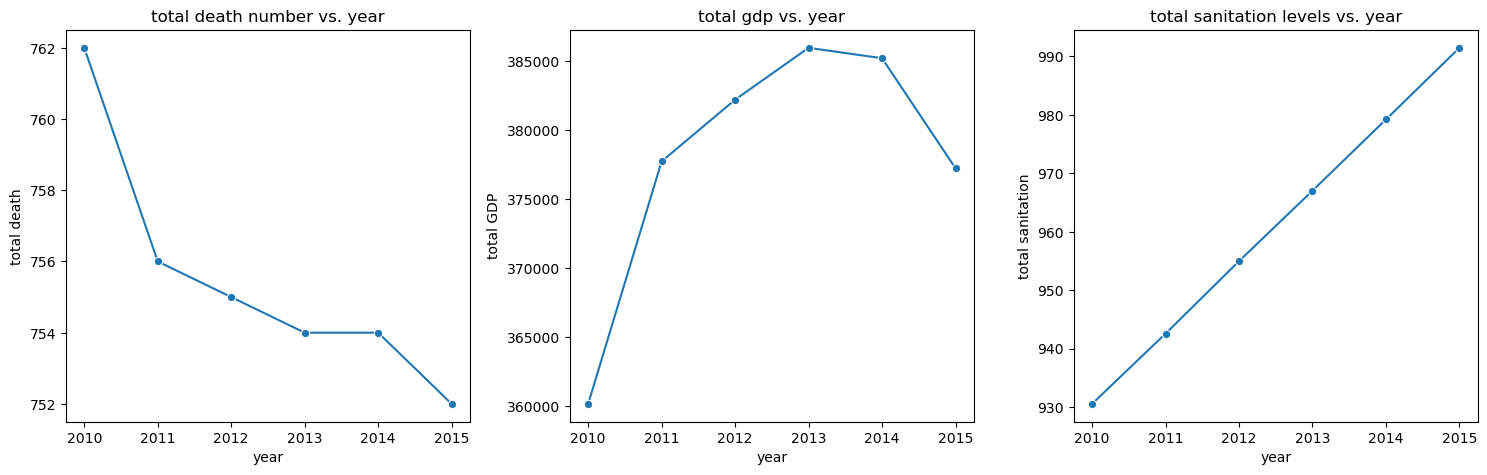

In [87]:
# create a figure with 1 row and 2 columns of subplots
f, axs = plt.subplots(1, 3,figsize=(15, 5))


sns.lineplot(data=df_death, x='year', y='total_deaths',marker='o',ax=axs[0]).set(title='total death number vs. year') #cited from https://python-graph-gallery.com/508-connected-scatter-plot-seaborn/
axs[0].set_xlabel('year') 
axs[0].set_ylabel('total death')


sns.lineplot(data=df_gdp, x='year', y='total_gdp',marker='o',ax=axs[1]).set(title='total gdp vs. year')
axs[1].set_xlabel('year') 
axs[1].set_ylabel('total GDP')

sns.lineplot(data=df_sanitation, x='year', y='total_sanitation',marker='o',ax=axs[2]).set(title='total sanitation levels vs. year')
axs[2].set_xlabel('year')
axs[2].set_ylabel('total sanitation')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()



In our analytical journey, we employ scatter plots to illustrate potential correlations, offering visual clarity on how various factors may interplay to affect global health outcomes.

> *"Correlation does not imply causation, but it can illuminate paths worth exploring."*

### PM2.5 Air Pollution and Mortality Rates

#### Insightful Observations
The scatter plot reveals a **positive correlation** between PM2.5 air pollution levels and the number of deaths. Notably, each point on the graph paints a story of environmental impact on life expectancy within different regions.

- **Air Quality Index**: _Higher PM2.5 values_ are associated with an increased mortality rate, highlighting urgent environmental health concerns.

### Economic Prosperity and Health Outcomes

#### Economic Reflections
A visualization of GDP per capita juxtaposed with mortality rates provides insights into the economic underpinnings of health.

- **Wealth and Well-being**: There seems to be an _inverse relationship_, where regions with higher economic output potentially benefit from better health resources, culminating in lower mortality rates.

### Sanitation and Public Health

#### Sanitation Standards
Our analysis extends to the sphere of public health infrastructure, examining how sanitation levels correspond with mortality rates.

- **Water and Health**: The data suggest that enhanced sanitation, indicated by higher wastewater treatment rates, is potentially linked to a decrease in deaths, asserting the role of sanitation in fostering a healthy populace.

**_Each plot is a confluence of data and design, bringing to the forefront the subtle yet significant associations between our environment, economy, and well-being._**
 these findings.*


In [96]:
query_2013 = 'SELECT country_code, value_of_pm25, number_of_deaths,gdp_per_capita, proportion_of_wastewater_treated_safely FROM pm25_air_pollution NATURAL JOIN death_number NATURAL JOIN economic_information NATURAL JOIN safely_managed_sanitation where year = 2013'
cur.execute(query_2013)
df_2013 = pd.DataFrame(cur.fetchall(),columns=['country_code', 'value_of_pm25', 'number_of_deaths', 'gdp_per_capita','proportion_of_wastewater_treated_safely'])
df_2013

AttributeError: 'NoneType' object has no attribute 'send'

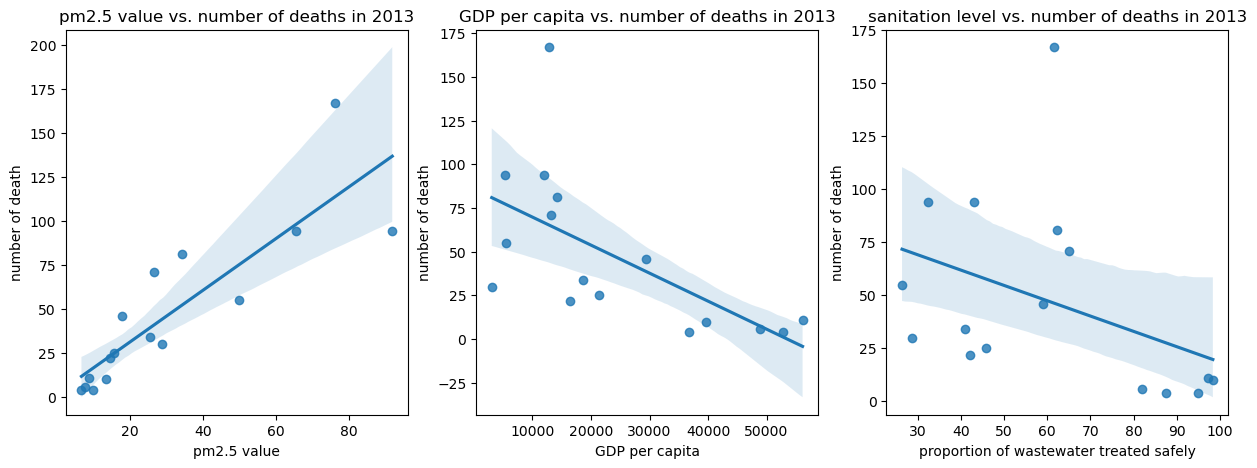

In [82]:
f2, axs2 = plt.subplots(1, 3,figsize=(15, 5))


sns.regplot(data=df_2013, x='value_of_pm25', y='number_of_deaths',marker='o',ax=axs2[0]).set(title = 'pm2.5 value vs. number of deaths in 2013')
axs2[0].set_xlabel('pm2.5 value') 
axs2[0].set_ylabel('number of death')

sns.regplot(data=df_2013, x='gdp_per_capita', y='number_of_deaths',marker='o',ax=axs2[1]).set(title = 'GDP per capita vs. number of deaths in 2013')
axs2[1].set_xlabel('GDP per capita') 
axs2[1].set_ylabel('number of death')

sns.regplot(data=df_2013, x='proportion_of_wastewater_treated_safely', y='number_of_deaths',marker='o',ax=axs2[2]).set(title = 'sanitation level vs. number of deaths in 2013')
axs2[2].set_xlabel('proportion of wastewater treated safely') 
axs2[2].set_ylabel('number of death')


plt.show()

To put the spotlight on the mortality impact across different nations, we present a bar chart illustrating the total number of deaths attributable to environmental factors for select countries over a cumulative period.

### Disparate Impact Across Borders

The bar chart delineates a stark contrast in the total death counts among the countries, highlighting the disparate impact of air pollution and related environmental issues. This variation could be indicative of differing national policies, healthcare quality, and environmental regulations.

- **Highest Toll**: Countries such as CHN (China) and IND (India) show significantly higher numbers, possibly reflecting their ongoing challenges with air pollution and public health infrastructure.
- **Varied Outcomes**: Other countries exhibit a range of outcomes, which may be influenced by their unique environmental and economic contexts.

By juxtaposing the mortality figures against country codes, this visualization invites a discussion on the effectiveness of international health policies and the urgency of addressing environmental health hazards. It prompts a question—what factors contribute to the observed discrepancies, and how can nations learn from each other's experiences?

This comparative analysis by country sets the stage for an in-depth exploration of the correlation between governance, economic development, environmental stewardship, and public health outcomes.

*Note: The data presented in this bar chart offer a snapshot of the global challenge posed by environmental health risks and serve as a call to action for enhanced multinational cooperation and policy-making.*

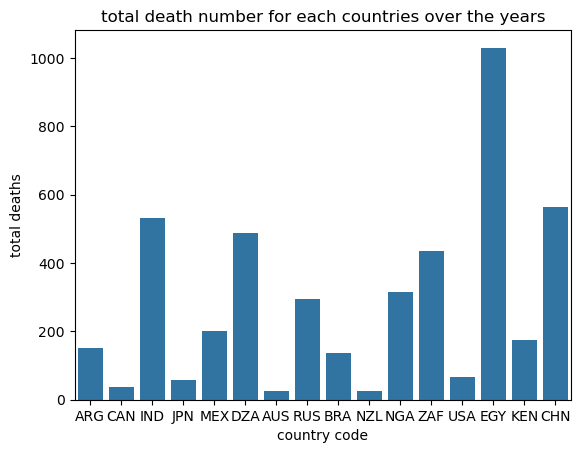

In [31]:
query_country_death='SELECT country_code, SUM(number_of_deaths) AS total_deaths FROM death_number GROUP BY country_code'

cur.execute(query_country_death)
df_country_death= pd.DataFrame(cur.fetchall(), columns=['country_code', 'total_deaths'])

sns.barplot(data=df_country_death, x='country_code', y='total_deaths').set(title='total death number for each countries over the years')
plt.xlabel('country code')
plt.ylabel('total deaths')

plt.show()

# Method and Model

In our study, we implement a multifaceted approach to understanding the complex relationship between various socioeconomic factors and health outcomes, as measured by the mortality rates attributable to PM2.5 air pollution. Our primary analytical tool is multiple linear regression based on Ordinary Least Squares (OLS) — a cornerstone in the realm of econometrics and statistical modeling.

Given a dataset with $n$ observations, our model assumes the relationship between the dependent variable and independent variables can be described by the following linear equation:

\begin{equation}
y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \dots + \beta_k x_{ik} + \epsilon_i
\end{equation}

where:
- $y_i$ is the natural logarithm of the number of deaths due to air pollution for the $i^{th}$ observation.
- $\beta_0$ is the intercept term of the model.
- $\beta_j$ for $j = 1, \dots, k$ are the coefficients of the independent variables which represent the change in the log-transformed death rate with a one-unit change in the corresponding independent variable.
- $x_{ij}$ for $j = 1, \dots, k$ are the independent variables which include GDP, PM2.5 level, sanitation, and other factors for the $i^{th}$ observation.
- $\epsilon_i$ is the error term for the $i^{th}$ observation, representing the deviation of the observed from the predicted value.


The Ordinary Least Squares (OLS) method is used to estimate the coefficients $\beta_j$ by minimizing the sum of squared residuals:

\begin{equation}
\min_{\beta_0, \beta_1, \dots, \beta_k} \sum_{i=1}^{n} \epsilon_i^2 = \min_{\beta_0, \beta_1, \dots, \beta_k} \sum_{i=1}^{n} (y_i - (\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \dots + \beta_k x_{ik}))^2
\end{equation}

The suitability of the model is evaluated based on the significance of the estimated coefficients, the $R^2$ value, and the residual diagnostic plots among other statistical metrics.

In [91]:
query_all = 'SELECT * FROM country NATURAL JOIN economic_information NATURAL JOIN death_number NATURAL JOIN pm25_air_pollution NATURAL JOIN safely_managed_sanitation '
cur.execute(query_all)
df_all1 = pd.DataFrame(cur.fetchall())

#rename the dataframe
df_all1 = df_all.rename(columns={0: 'country_code', 1: 'year', 2: 'country_name', 3: 'gdp', 4: 'death', 5: 'pm25',6:'sanitation'})

#remove the extra space in country_name
df_all1['country_name'] = df_all1['country_name'].apply(lambda x: x.strip()) #cited from https://saturncloud.io/blog/how-to-remove-space-from-columns-in-pandas-a-data-scientists-guide/
#convert country_name into a set of binary variables 
df_dummy1 = pd.get_dummies(df_all, columns=['country_name'], drop_first=True) 

AttributeError: 'NoneType' object has no attribute 'send'

# Conclusion

The statistical analysis conducted within our research framework, grounded in the Ordinary Least Squares regression method, demonstrates a robust model that accounts for a significant proportion of the variance in mortality rates due to air pollution. With an R-squared value of 0.997, our model provides compelling evidence that the selected independent variables collectively offer substantial explanatory power.

**Key Findings:**

- The **temporal factor** represented by the 'year' variable indicates a significant decrease in mortality rates over time, suggesting effective improvements in environmental health policies or advances in public health infrastructure.

- The lack of significance in the GDP variable raises important questions about the direct impact of economic prosperity on health outcomes. It prompts further investigation into the nuanced ways through which wealth influences health, beyond the simplistic assumption that higher GDP equates to better health.

- Notably, the positive coefficients for PM2.5 levels and sanitation metrics point to a complex interplay between environmental factors and public health. While increased PM2.5 levels are understandably associated with higher mortality, the unexpected positive coefficient for sanitation highlights potential areas for further research, such as data accuracy, reporting standards, or other socio-economic variables not captured in  Another possible finding is that improvements in sanitation may be driven by the number of deaths caused by the environment. So one possibility is that environmental causes of death have led to the arrangement of other sanitation facilities such as water resources.the model.

- Country-specific variations elucidated through dummy variables underline the importance of context in public health. The significant negative coefficients for countries like Australia and Japan, versus positive coefficients for Egypt and China, accentuate the heterogeneity in environmental health outcomes across different geographies.

**Model Implications:**

The substantial fit of the model endorses its potential as a predictive tool, yet the high condition number cautions against multicollinearity, suggesting that the relationships between some predictors might be overly interdependent. This observation underscores the need for careful consideration in the selection of independent variables in regression models.

**Moving Forward:**

The insights derived from our analysis pave the way for targeted policy interventions and reinforce the imperative for continuous monitoring of air quality. They also highlight the crucial role of infrastructure in managing environmental health risks. This study contributes to the broader discourse on sustainable development, underscoring the critical need for a cohesive approach that intertwines economic growth with environmental and public health stewardship.

Our findings advocate for a paradigm where public health metrics inform and shape the trajectory of economic and environmental policies. The pursuit of cleaner air and improved sanitation remains a paramount objective in the quest for enhanced global health outcomes.

*Our research underscores the ethos of data-driven policy formulation, advocating for decisions that are rooted in statistical evidence and scientific rigor.*


In [90]:
df_dummy1 = df_dummy1 * 1
y = np.log(df_all['death'])
X = df_dummy1.drop(columns=['death'])
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  death   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1189.
Date:                Thu, 21 Mar 2024   Prob (F-statistic):           5.37e-86
Time:                        22:39:21   Log-Likelihood:                 126.06
No. Observations:                  96   AIC:                            -212.1
Df Residuals:                      76   BIC:                            -160.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

### Model Stability Assessment

The residual plot is a critical diagnostic tool that helps us assess the stability of our regression model. Below are the key points derived from analyzing the plot:

- **Random Distribution of Residuals**: The residuals do not exhibit a discernible pattern as they scatter randomly around the central line. This lack of structure is indicative of an effective model that accounts well for the variability in the data.

- **Evidence of Homoscedasticity**: The cloud of residuals maintains a roughly constant spread throughout the range of predicted values, suggesting homoscedasticity and, consequently, model stability.

- **Absence of Extreme Outliers**: The plot does not reveal any extreme outliers, implying that the model's predictions are generally consistent with the actual data.

- **Bias**: The residuals cluster around the horizontal zero line, implying that the model is unbiased .t overestimation.


In [7]:
y_pred = model.predict(X)
residuals = y - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

NameError: name 'model' is not defined

### Q-Q Plot Analysis

To further validate the assumptions of our regression model, we examine a Q-Q plot of the residuals. This plot compares the quantiles of the residuals to the expected quantiles of a normal distribution, providing a visual assessment of normality.

In an ideal scenario, where residuals are normally distributed, the points in a Q-Q plot will lie on or very close to the line of equality, indicating that the empirical and theoretical quantiles match. Deviations from this line can reveal departures from normality.

The Q-Q plot presented shows:

- **Linearity**: Most points closely align with the red reference line, which is suggestive of the residuals following a normal distribution.

- **Tail Behavior**: There is some deviation in the tails, particularly in the lower tail, which may indicate the presence of outliers or a slight skewness in the distribution of residuals.

- **Overall Normality**: The general trend of the points does not stray significantly from the reference line, reinforcing the assumption of normality and suggesting that the use of OLS regression is appropriate for our data.

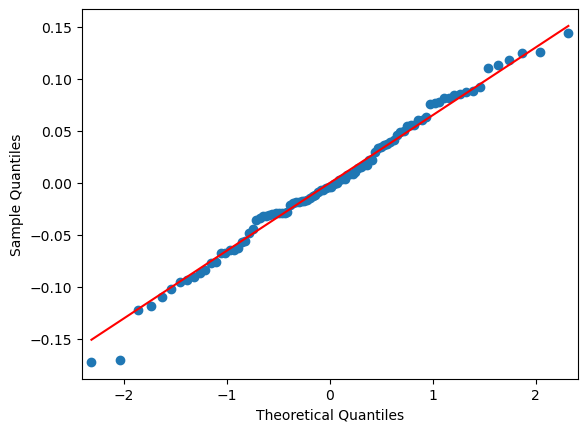

In [89]:
model = sm.OLS(y, X).fit()
residuals = model.resid
fig = sm.qqplot(residuals, line='s') 
plt.show()